# 규제 선형 모델

***

이번 챕터에서는 **규제(Regularization)**를 사용하여 과적합을 방지하는 **규제 선형 모델**에 대해서 알아보도록 하겠습니다. 머신러닝 회귀 모델에 규제 선형 모델은 크게 3가지로 **릿지, 라쏘, 엘라스틱넷**이 있습니다. 

우선 규제 선형 모델은 잔차를 구하는 수식에 **규제항**이 추가됩니다. 규제 선형 모델의 학습 과정은 아래 식을 최소화 하기 위해 회귀계수를 갱신합니다.

### <center><font color = 'red'>목적함수(w) = $\min(MSE(w)$ + $\alpha$$f(w))$
#### <center><font color = 'black'>(f(w)는 회귀계수들을 활용한 함수로 각 알고리즘별로 적용 함수가 다름)<br></center>
<br>먼저 **alpha**는 회귀 계수 값의 크기를 제어하는 파라미터입니다. 만약 alpha가 매우 작다면 규제 선형 모델의 목적은 기존 처럼 단순히 잔차를 줄이는 것이 목적이 될것입니다.<br>

<br>    
<font color = 'blue'>즉 alpha가 매우 작으면 w가 커져도 목적 함수 자체의 값을 줄일 수 있고 반대로 alpha가 매우 커지면 w의 크기를 줄여 데이터의 과적합을 줄일 수 있습니다.
    
<font color = 'black'>이제 각 기법별로 자세히 살펴보도록 하겠습니다.
***

## Ridge
    
먼저 **Ridge**는 **L2 규제**를 사용하는데 L2규제는 **회귀계수의 제곱에 페널티를 부여**합니다. Ridge의 f(w)는 회귀계수의 제곱합으로 즉 **잔차에 회귀계수의 제곱합**을 최소화 하는 것이 Ridge의 목적입니다.<br><br>

#### <center>Ridge회귀의 목적 함수(w) = $min$($MSE(w)$ + $\alpha$$\frac{1}{2}$$\sum_{i}$$w^2)$ </center>
    
릿지 회귀는 feature의 **scaling**에 민감하기 때문에 수행 전에 **scaling**을 맞추는 것이 중요합니다(Hands on MachineLearning 참고). 릿지회귀의 장점은 영향력이 없는 특성은 **0에 가까운 가중치**를 줘 **모든 feature를 사용**한다는 것입니다. 실습을 통해서 기본 회귀 모델과 비교를 해보겠습니다.

In [147]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error # 평가지표로 RMSE 활용하기 위해 MSE 호출
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston

In [3]:
X = load_boston().data # features
y = load_boston().target # target

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 109)

alpha를 0.1으로 설정하고 학습해 보도록 하겠습니다.

In [140]:
ridge_reg = Ridge(alpha = .1, random_state = 2021)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
print(f'{ridge_reg.__class__.__name__}의 RMSE는 {np.sqrt(mean_squared_error(y_test, ridge_pred))}')

Ridge의 RMSE는 4.778216644029878


LinearRegression을 사용해 기본 선형 회귀 모델의 성능을 확인해보도록 하죠.

In [141]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
mean_squared_error(y_test, lr_pred)
print(f'{lr_reg.__class__.__name__}의 RMSE는 {np.sqrt(mean_squared_error(y_test, lr_pred))}')

LinearRegression의 RMSE는 4.781465969015178


릿지 모델이 기본 선형 모델 보다 근소하게 성능이 우수한 것을 알 수 있습니다. 데이터의 수가 적기 때문에 cross_val_score를 활용해서 alpha가 달라질 때 성능을 확인해보도록 하겠습니다.

In [160]:
a_list = [0, .1, 5, 10, 100]

for a in a_list :
    ridge = Ridge(alpha = a, random_state = 109)
    
    mse = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 7)
    rmse = round(np.mean(np.sqrt(-mse)), 5)
    
    print(f'alpha가 {a}일 때 7FOLD의 RMSE 평균은 {rmse}')

alpha가 0일 때 7FOLD의 RMSE 평균은 4.98824
alpha가 0.1일 때 7FOLD의 RMSE 평균은 4.98801
alpha가 5일 때 7FOLD의 RMSE 평균은 5.0331
alpha가 10일 때 7FOLD의 RMSE 평균은 5.03334
alpha가 100일 때 7FOLD의 RMSE 평균은 5.12749


alpha가 0.1일 때 RMSE가 4.98801로 가장 낮은 것을 확인하였습니다. 이번에는 alpha 값에 따라 각 회귀계수들의 값이 어떻게 달라지는지 살펴보겠습니다.

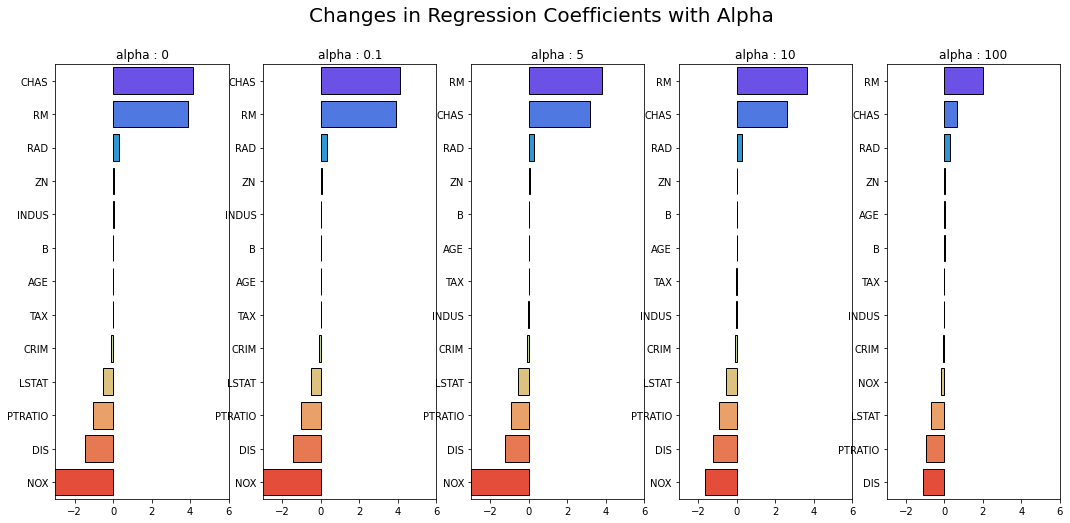

In [169]:
fig, ax = plt.subplots(figsize = (18, 8), nrows = 1, ncols = 5)
w_df = pd.DataFrame()
plt.suptitle('Changes in Regression Coefficients with Alpha', size = 20)
for l, a in enumerate(a_list) :
    ridge = Ridge(alpha = a, random_state = 109)
    ridge.fit(X_train, y_train)
    
    w = pd.Series(ridge.coef_, index = load_boston().feature_names)
    col = 'alpha : ' + str(a)
    w_df[col] = w
    
    w = w.sort_values(ascending = False)
    ax[l].set_title(col)
    ax[l].set_xlim(-3, 6)
    sns.barplot(w.values, w.index, ax = ax[l], edgecolor = (0,0,0), palette = 'rainbow')
    
plt.show()

앞서 언급한 것 처럼 릿지는 모든 feature를 사용하기 때문에 회귀계수가 0인 변수는 존재하지 않는 것을 알 수 있습니다. alpha가 커지면서 회귀계수는 작아지지만 값 자체가 0이 되지는 않습니다. 

***

## Lasso
    
먼저 **Lasso**는 **L1 규제**를 사용하는데 L1규제는 **회귀계수의 절댓값의 합에 페널티를 부여**합니다. Lasso의 f(w)는 회귀계수의 절댓값의 합으로 즉 **잔차에 회귀계수의 절댓값 합**을 최소화 하는 것이 Lasso의 목적입니다.<br><br>

#### <center>Lasso회귀의 목적 함수(w) = $min$($MSE(w)$ + $\alpha$$\sum_{i}$|w|)
    
회귀 계수의 크기 감소에 주력하는 L2 규제에 비해 **L1 규제는 불필요한 feature의 회귀 계수를 0으로 만들어 해당 변수를 제거**합니다. 이로 인해 라쏘는 필요한 feature만 포함시키는 **피쳐 선택의 장점**이 있습니다.

In [170]:
lasso_reg = Lasso(alpha = .1, random_state = 2021)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
print(f'{lasso_reg.__class__.__name__}의 RMSE는 {np.sqrt(mean_squared_error(y_test, lasso_pred))}')

Lasso의 RMSE는 4.814107361128821


동일한 alpha 값을 통해서 학습 및 예측을 해본 결과 이전의 Ridge(RMSE = 4.778)과 LinearRegression(RMSE = 4.781) 보다 성능이 낮은 것을 알 수 있습니다. alpha 값의 변화에 따른 성능 차이를 보도록 하겠습니다.

In [171]:
a_list = [0, .1, 5, 10, 100]

for a in a_list :
    lasso = Lasso(alpha = a, random_state = 109)
    
    mse = cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 7)
    rmse = round(np.mean(np.sqrt(-mse)), 5)
    
    print(f'alpha가 {a}일 때 7FOLD의 RMSE 평균은 {rmse}')

alpha가 0일 때 7FOLD의 RMSE 평균은 4.98824
alpha가 0.1일 때 7FOLD의 RMSE 평균은 5.09773
alpha가 5일 때 7FOLD의 RMSE 평균은 6.2386
alpha가 10일 때 7FOLD의 RMSE 평균은 6.52335
alpha가 100일 때 7FOLD의 RMSE 평균은 8.14309


alpha가 0일 때 즉 목적 함수가 기본 선형 회귀 모델과 같을 때가 성능이 제일 좋은 것을 알 수 있습니다.

In [186]:
w_df = pd.DataFrame()
for l, a in enumerate(a_list) :
    lasso = Lasso(alpha = a, random_state = 109)
    lasso.fit(X_train, y_train)
    
    w = pd.Series(lasso.coef_, index = load_boston().feature_names)
    col = 'alpha : ' + str(a)
    w_df[col] = w
    
    w = w.sort_values(ascending = False)
    print(f'alpha가 {a}일 때 크기가 0이 아닌 회귀계수는 {w[w > 0].index.values}')

alpha가 0일 때 크기가 0이 아닌 회귀계수는 ['CHAS' 'RM' 'RAD' 'ZN' 'INDUS' 'B' 'AGE']
alpha가 0.1일 때 크기가 0이 아닌 회귀계수는 ['RM' 'CHAS' 'RAD' 'ZN' 'B']
alpha가 5일 때 크기가 0이 아닌 회귀계수는 ['AGE' 'ZN' 'B']
alpha가 10일 때 크기가 0이 아닌 회귀계수는 ['ZN' 'B']
alpha가 100일 때 크기가 0이 아닌 회귀계수는 ['B']


alpha 값에 따라서 회귀계수가 0이 아닌 feature들은 위와 같습니다. 이처럼 라쏘는 모델 학습과정에서 적절한 피쳐만 사용한다는 것을 알 수 있습니다.
***

## Elastic Net
    
먼저 **Elastic Net**는 **릿지와 라쏘를 절충한 모델**로 규제항은 **L1 규제와 L2 규제의 합**을 사용하는데 **혼합 비율**파라미터를 사용해 L1, L2 규제의 비율을 설정합니다. L1 비율이 0이면 L2 규제만 사용하고 L1 비율이 1이면 L2 규제는 사용되지 않습니다.

#### <center>Elastic Net회귀의 목적 함수(w) = $min$($MSE(w)$ + $\alpha$$\sum_{i}$|w| + $\frac{1}{2}$$\sum_{i}$$w^2)$)
    
라쏘 회귀의 경우 회귀계수를 0으로 만들기 때문에 소수의 피처들만 사용될 경우 회귀계수의 값이 급변할 수 있기 때문에 여기에 L2규제를 더한 것입니다. 반대로 수행시간이 오래걸린다는 단점이 있습니다. 엘라스틱넷의 **l1_ratio** 값은 **$\frac{L1alpha}{L1 alpha + L2 alpha}$**   입니다. 만약 l1_ratio가 1이면 L1 규제와 동일하고 0이면 L2규제와 동일합니다. 또한 엘라스틱넷의 alpha는 L1 규제와 L2 규제를 더한 값입니다.

In [211]:
ela = ElasticNet(l1_ratio = .7, random_state = 109)
ela.fit(X_train, y_train)
ela_pred = ela.predict(X_test)
print(f'{ela.__class__.__name__}의 RMSE는 {np.sqrt(mean_squared_error(y_test, ela_pred))}')

ElasticNet의 RMSE는 5.049100215790087


지금까지 규제 선형 모델에 대해서 공부해보았습니다. 다음챕터에서는 트리 기반의 회귀 모델에 대해서 공부해보도록 하겠습니다. 감사합니다.